In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_data = pd.read_excel('train_data.xlsx')

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Perform data preprocessing and extract derived features

In [9]:
data = train_data.copy()

In [10]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [12]:
def change_into_datetime(col):
  data[col] = pd.to_datetime(data[col])

In [13]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for feature in ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
  change_into_datetime(feature)


In [16]:
data.dtypes


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [18]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [19]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [20]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-23 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-23 05:50:00,2024-05-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-23 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [21]:
def extract_hour_min(df,col):
  df[col+"_hour"] = df[col].dt.hour
  df[col+ "_minute"] = df[col].dt.minute

In [22]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [23]:
extract_hour_min(data,'Dep_Time')

In [24]:
extract_hour_min(data, 'Arrival_Time')

In [25]:
cols_to_drop = ['Arrival_Time', 'Dep_Time']
data.drop(cols_to_drop,axis = 1,inplace = True)

In [26]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [27]:
data.shape

(10682, 16)

# Data analysis

In [28]:
def flight_dept_time(x):
  if (x>4) and (x<=8):
    return 'early morning'
  elif(x>8)and (x<=12):
      return "morning"
  elif(x>12) and (x<=20):
        return" noon"
  elif(x>20) and (x<=24):
          return"evening"
  else:
            return"late night"


<Axes: xlabel='Dep_Time_hour'>

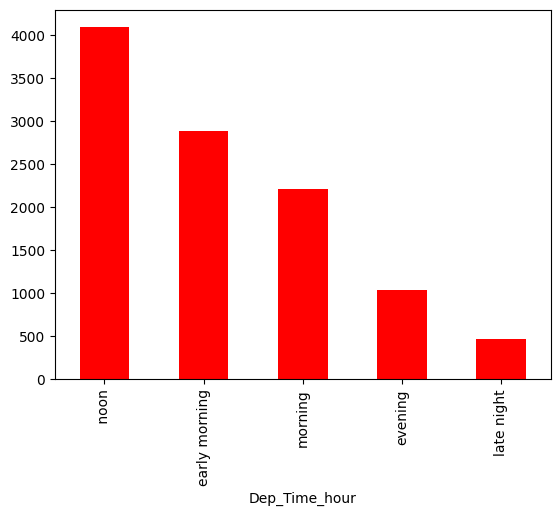

In [29]:
data["Dep_Time_hour"].apply(flight_dept_time).value_counts().plot(kind = "bar", color = "r")

# Preprocessing on duration feature

In [30]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [31]:
data["Duration"] = data['Duration'].apply(preprocess_duration)
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [32]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_hours']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hours, Length: 10682, dtype: int64

In [33]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))
data['Duration_mins']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_mins, Length: 10682, dtype: int64

In [34]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


# lets analyse duration impact price or not

In [35]:
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [36]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [37]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [38]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

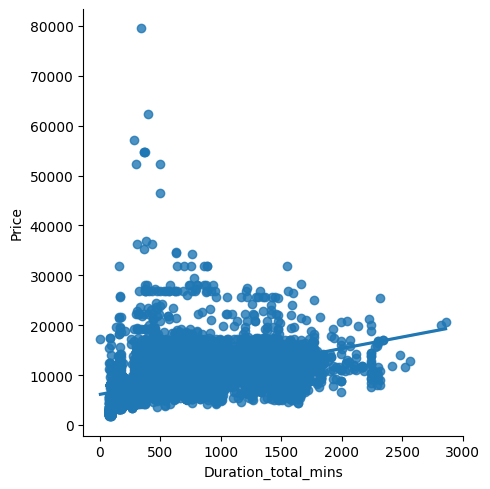

In [39]:
sns.lmplot(x='Duration_total_mins', y = 'Price', data = data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

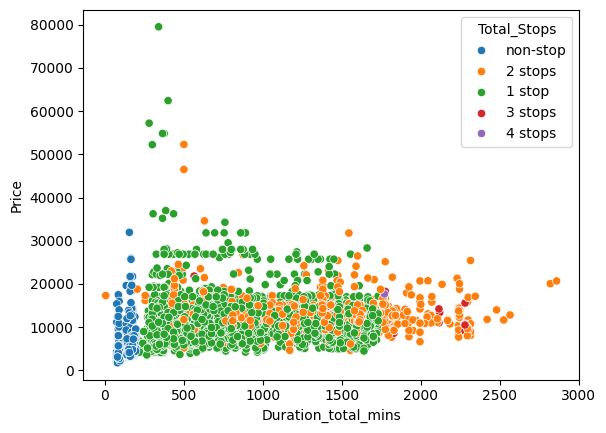

In [40]:
sns.scatterplot(x='Duration_total_mins', y = 'Price',hue = 'Total_Stops' ,data = data)




# lets perform Bi- variate Analysis

In [41]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [42]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

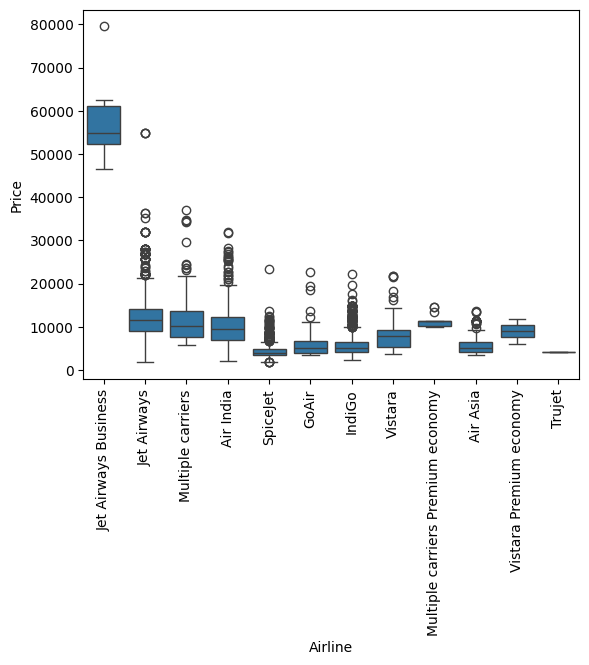

In [43]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()


# Apply one hot on data

In [44]:
cat_col = [col for col in data.columns if data[col].dtype== "object"]
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [45]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [46]:
num_col = [col for col in data.columns if data[col].dtype!= "object"]
num_col

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [47]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [48]:
data['Source'].apply(lambda x: 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [49]:
for sub_category in data['Source'].unique():
    data['source' + sub_category] = data['Source'].apply(lambda x :1 if x == sub_category  else 0)

In [50]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,sourceBanglore,sourceKolkata,sourceDelhi,sourceChennai,sourceMumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


# Apply target guided encoding on data

In [51]:
data['Airline'].nunique()

12

In [52]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [53]:
airline =data.groupby(['Airline'])['Price'].mean().sort_values().index
airline

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [54]:
dict_airlines = {key: index for index,key in enumerate(airline , 0)}

In [55]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [56]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [57]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [58]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,sourceBanglore,sourceKolkata,sourceDelhi,sourceChennai,sourceMumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [59]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [60]:
data['Destination'].replace('NEw Delhi', 'Delhi' , inplace = True)

In [61]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [62]:
dest =data.groupby(['Destination'])['Price'].mean().sort_values().index

In [63]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [64]:
dict_dest = {key: index for index,key in enumerate(dest , 0)}

In [65]:
dict_dest

{'Kolkata': 0,
 'Hyderabad': 1,
 'Delhi': 2,
 'Banglore': 3,
 'Cochin': 4,
 'New Delhi': 5}

In [66]:
data['Destination'] = data['Destination'].map(dict_dest)

In [67]:
data['Destination']

0        5
1        3
2        4
3        3
4        5
        ..
10678    3
10679    3
10680    2
10681    5
10682    4
Name: Destination, Length: 10682, dtype: int64

In [68]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,sourceBanglore,sourceKolkata,sourceDelhi,sourceChennai,sourceMumbai
0,3,2019-03-24,Banglore,5,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


# Lets Perform Label Encoding manually ! (Feature Encoding)


In [69]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [70]:
stop = {'non-stop': 0, '2 stops': 1, '1 stop': 2, '3 stops': 3, '4 stops': 4}

In [71]:
data['Total_Stops'] =data['Total_Stops'].map(stop)

In [72]:
data['Total_Stops']

0        0
1        1
2        1
3        2
4        2
        ..
10678    0
10679    0
10680    0
10681    0
10682    1
Name: Total_Stops, Length: 10682, dtype: int64

In [73]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,sourceBanglore,sourceKolkata,sourceDelhi,sourceChennai,sourceMumbai
0,3,2019-03-24,Banglore,5,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,1,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,1,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [74]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'sourceBanglore',
       'sourceKolkata', 'sourceDelhi', 'sourceChennai', 'sourceMumbai'],
      dtype='object')

In [75]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [76]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [77]:
data.drop(columns = ['Route'], axis = 1, inplace = True)

In [78]:
data.head(4)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,sourceBanglore,sourceKolkata,sourceDelhi,sourceChennai,sourceMumbai
0,3,5,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,1,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,1,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,5h 25m,2,6218,12,5,18,5,23,30,5,25,0,1,0,0,0


In [79]:
data.drop(columns = ['Duration'], axis = 1, inplace = True)

In [80]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,sourceBanglore,sourceKolkata,sourceDelhi,sourceChennai,sourceMumbai
0,3,5,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,1,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,1,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


# Handle outlier in data

In [81]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

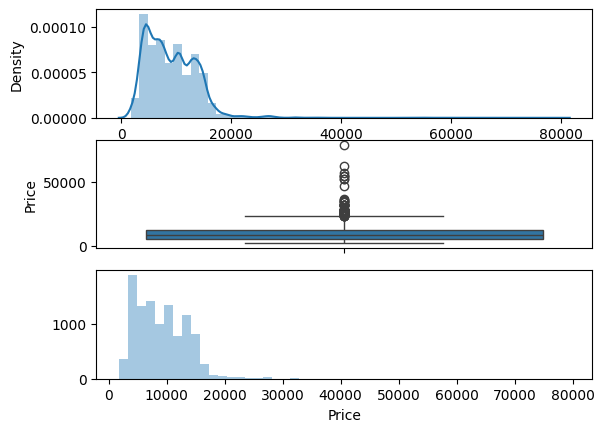

In [82]:
plot (data,'Price')

In [83]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [84]:
print(maximum)

23017.0


In [85]:
print(minimum)

-5367.0


In [86]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [87]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

# How to deal with Outlier

In [88]:
### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

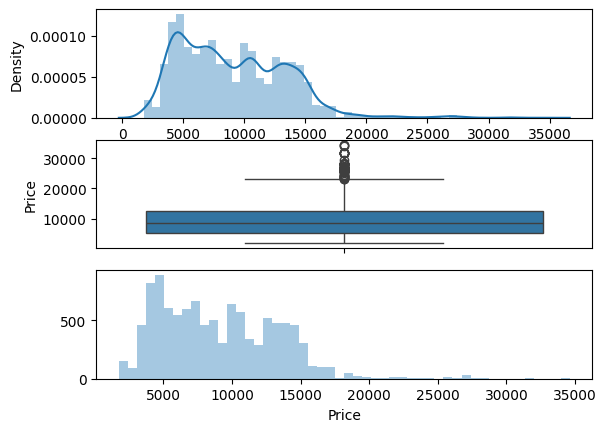

In [89]:
plot(data , 'Price')

# . Lets Perform feature selection

In [90]:
X = data.drop(['Price'] , axis=1)

In [91]:
y = data['Price']

In [92]:
from sklearn.feature_selection import mutual_info_regression

In [93]:
imp = mutual_info_regression(X , y)

'
Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables.
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.


In [94]:
imp

array([0.96849874, 1.12521787, 0.80105168, 0.24185724, 0.62262909,
       0.32907827, 0.26418263, 0.39658133, 0.35454633, 0.46429659,
       0.34121847, 0.38705916, 0.45868051, 0.52382697, 0.14126644,
       0.19542449])

In [95]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [96]:
imp_df.columns = ['importance']

In [97]:
imp_df

,importance
Airline,0.968499
Destination,1.125218
Total_Stops,0.801052
Journey_day,0.241857
Journey_month,0.622629
Dep_Time_hour,0.329078
Dep_Time_minute,0.264183
Arrival_Time_hour,0.396581
Arrival_Time_minute,0.354546
Duration_hours,0.464297


In [98]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Destination,1.125218
Airline,0.968499
Total_Stops,0.801052
Journey_month,0.622629
sourceDelhi,0.523827
Duration_hours,0.464297
sourceKolkata,0.458681
Arrival_Time_hour,0.396581
sourceBanglore,0.387059
Arrival_Time_minute,0.354546


# Lets Build ML model

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

what we often do in modelling:
a..Initially ,lets build basic random model.
b..then later-on , we will try to improve this model using some parameters..
c..Then we will try to improve it..
d..Then we will hyper-tune my model to get optimal value of parameters in order to achiev

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
ml_model = RandomForestRegressor()

In [110]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [111]:
y_pred = ml_model.predict(X_test)

In [112]:
y_pred

array([16842.31,  5315.29,  8714.55, ...,  3595.87,  6175.22,  6895.87])

In [113]:
from sklearn import metrics

In [114]:
metrics.r2_score(y_test , y_pred)

0.8100108402727432

# b.. Lets Save model

advantage of dumping--
imagine in future we have new data & lets say we have to predict price on this huge data

then to do prediction on this new data , we can use this pre-trained model what we have dumped..

In [118]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [121]:
import pickle

In [119]:
# open a file, where you want to store the data
file = open('train_data.xlsx' , 'wb')

In [122]:
# dump information to that file
pickle.dump(ml_model , file)

In [123]:
model = open('train_data.xlsx', 'rb')

In [124]:
forest = pickle.load(model)

In [125]:
y_pred2 = forest.predict(X_test)

In [126]:
metrics.r2_score(y_test , y_pred2)

0.8100108402727432

# .. How to automate ml pipeline & How to define your Evaluation metric..

# a.. how to make our own metric...

In [127]:
def mape(y_true , y_pred):# mean absolute percent error
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [128]:
mape(y_test , y_pred)

13.115303726461585

In [129]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9515970714923667
predictions are : [16806.54  5420.9   8840.55 ...  3471.06  6369.66  6803.84]


r2 score : 0.8131451314247504
MAE : 1175.2980646704789
MSE : 3637615.776959521
RMSE : 1907.253464267275
MAPE : 13.19060783414043


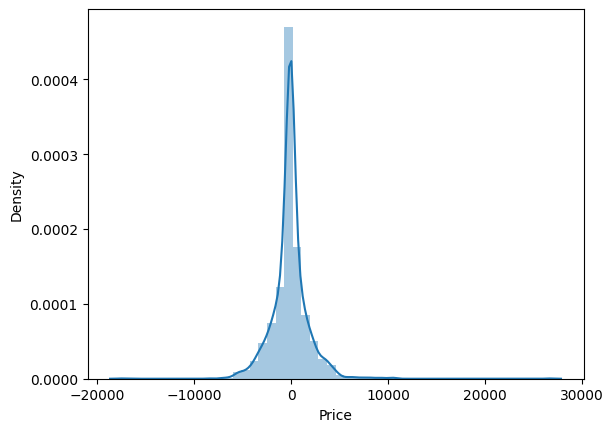

In [130]:
predict(RandomForestRegressor())

In [131]:
from sklearn.tree import DecisionTreeRegressor


Training score : 0.966591628243878
predictions are : [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score : 0.6856222002260832
MAE : 1400.5146387120928
MSE : 6120181.149697367
RMSE : 2473.899987812233
MAPE : 15.4010670934232


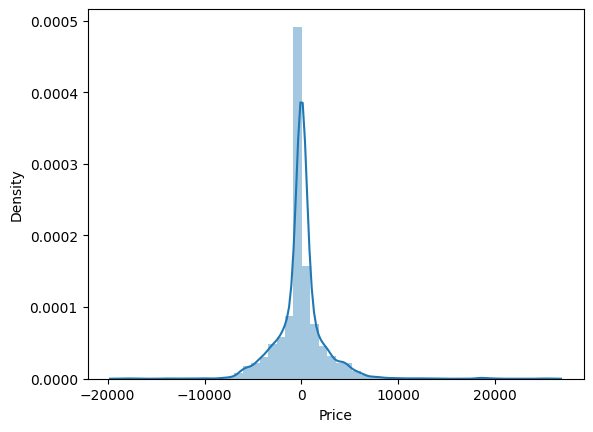

In [132]:
predict(DecisionTreeRegressor())

# how to hypertune ml model